# **This notebook handles the EDA**

## Objectives

* In this notebook we will perform exploratory data analysis (EDA) on the dataset to understand its structure, identify patterns, and uncover insights that will inform subsequent analysis and modeling steps.
* It will be done in 2 phases:
    1. Descriptive EDA: This phase involves summarizing the main characteristics of the dataset. We will also visualize the data using charts and graphs to identify trends and patterns.
    2. Hypothesis-Driven EDA: In this phase, we will formulate specific hypotheses based on initial observations and test them using statistical methods. This will help us validate or refute our assumptions about the data.

## Inputs

* The input data will be the cleaned_diabetes_data.csv file generated from the ETL notebook.

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\nived\\Desktop\\Nivya work learnings\\data analytics_ai\\Capstone\\Healthcare_Diabetes_Analysis\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\nived\\Desktop\\Nivya work learnings\\data analytics_ai\\Capstone\\Healthcare_Diabetes_Analysis'

# Phase 1: Descriptive EDA

Here we will be performing descriptive EDA on the dataset to summarize its main characteristics and visualize the data to identify trends and patterns.

* Import necessary libraries

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


* Load the clean dataset and display the first few rows

In [5]:
df = pd.read_csv('Data/cleaned/cleaned_diabetes_data.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Male,80,0,0,former,26.40,8.2,126,1
1,Female,47,0,0,never,45.88,4.0,159,0
2,Female,26,0,0,not current,27.32,6.0,130,0
3,Male,80,0,0,No Info,27.32,7.5,160,1
4,Male,57,0,0,No Info,27.32,5.8,158,0


* inspect the dataset for data types, missing values, and basic statistics

In [7]:
# using info() to get a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9042 entries, 0 to 9041
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               9042 non-null   object 
 1   age                  9042 non-null   int64  
 2   hypertension         9042 non-null   int64  
 3   heart_disease        9042 non-null   int64  
 4   smoking_history      9042 non-null   object 
 5   bmi                  9042 non-null   float64
 6   HbA1c_level          9042 non-null   float64
 7   blood_glucose_level  9042 non-null   int64  
 8   diabetes             9042 non-null   int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 635.9+ KB


    -  No null values, and all columns have appropriate data types.

* check for count of missing values (Nan / None values) in each column

In [11]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

    -  No missing values found

* checking for duplicates

In [18]:
df.duplicated().sum()

0

    - no duplicates found

* Checking the statistical summary of numerical columns using describe()

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,9042.0,54.966158,17.211084,18.00,42.0000,57.000,69.0000,80.00
hypertension,9042.0,0.164455,0.370708,0.00,0.0000,0.000,0.0000,1.00
heart_disease,9042.0,0.095665,0.294147,0.00,0.0000,0.000,0.0000,1.00
bmi,9042.0,30.372424,7.090530,10.98,27.0625,27.535,33.4775,88.72
HbA1c_level,9042.0,6.243696,1.295101,3.50,5.7000,6.100,6.8000,9.00
blood_glucose_level,9042.0,166.425680,57.781870,80.00,130.0000,155.000,200.0000,300.00
diabetes,9042.0,0.547003,0.497813,0.00,0.0000,1.000,1.0000,1.00


* The describe() function provides a summary of statistics for numerical columns, including count, mean, standard deviation, minimum, maximum, and quartiles. Below is the desciption for few statistical terms used in the summary:

  -  Mean: The mean is the average value of a dataset, indicating its central tendency.

  -  Median: The median is the middle value that separates the higher half from the lower half of a dataset.

  -  Standard Deviation: Standard deviation measures how spread out the values in a dataset are around the mean.

  -  Hypothesis Testing: Hypothesis testing is a method to determine whether a result is statistically significant or due to random chance.

  -  Probability: Probability quantifies the likelihood of an event occurring within a defined set of outcomes.

* I would like to check if the max value of:
    -  9 for HbA1c_level is a valid value or an outlier.
    - 88.72 for BMI is a valid value or an outlier.
    - 300 for glucose level is a valid value or an outlier.

In [15]:
# using a custom function to check for outliers using the IQR method

def check_outlier_iqr(df, column, value):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return value < lower_bound or value > upper_bound

# applying the above funtion to columns HbA1c_level, BMI, and glucose_level

columns_to_check = ['HbA1c_level', 'bmi', 'blood_glucose_level']
values_to_check = [9, 88.72, 300]  # values to check for each column taken from max values in describe()

for col, val in zip(columns_to_check, values_to_check):
    result = check_outlier_iqr(df, col, val)
    print(f"Is {val} an outlier in {col}? → {result}")

Is 9 an outlier in HbA1c_level? → True
Is 88.72 an outlier in bmi? → True
Is 300 an outlier in blood_glucose_level? → False


    -  From the IQR we can see that the max values for HbA1c_level, BMI are outliers. will visualise them using plots and decide how to handle them.

* Target variable analysis - distribution of the target variable diabetes

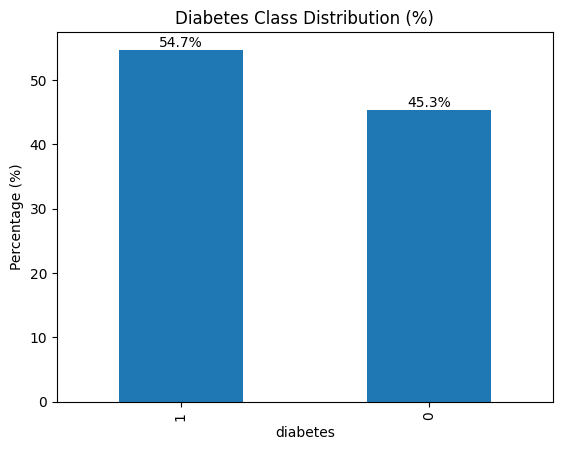

In [26]:
# calculating the percentage distribution of the target variable 'diabetes'

diabetes_class_percentages = df['diabetes'].value_counts(normalize=True)*100

# Plot as bar chart
ax = diabetes_class_percentages.plot(kind='bar', title='Diabetes Class Distribution (%)')

# Add percentage labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')

plt.ylabel('Percentage (%)')
plt.show()


    -  The target class is relatively balanced with 45.3% having no diabetes and 54.7% having diabetes.

*Note: For purpose of this project, the actual dataset has been modified to have a balanced target variable. Post cleaning this is the distribution of the target variable.*

* A basic histogram+KDE to visualize the distribution of the numerical features.
     - excluding target variable diabetes, numeric binary variables hypertension, heart_disease.

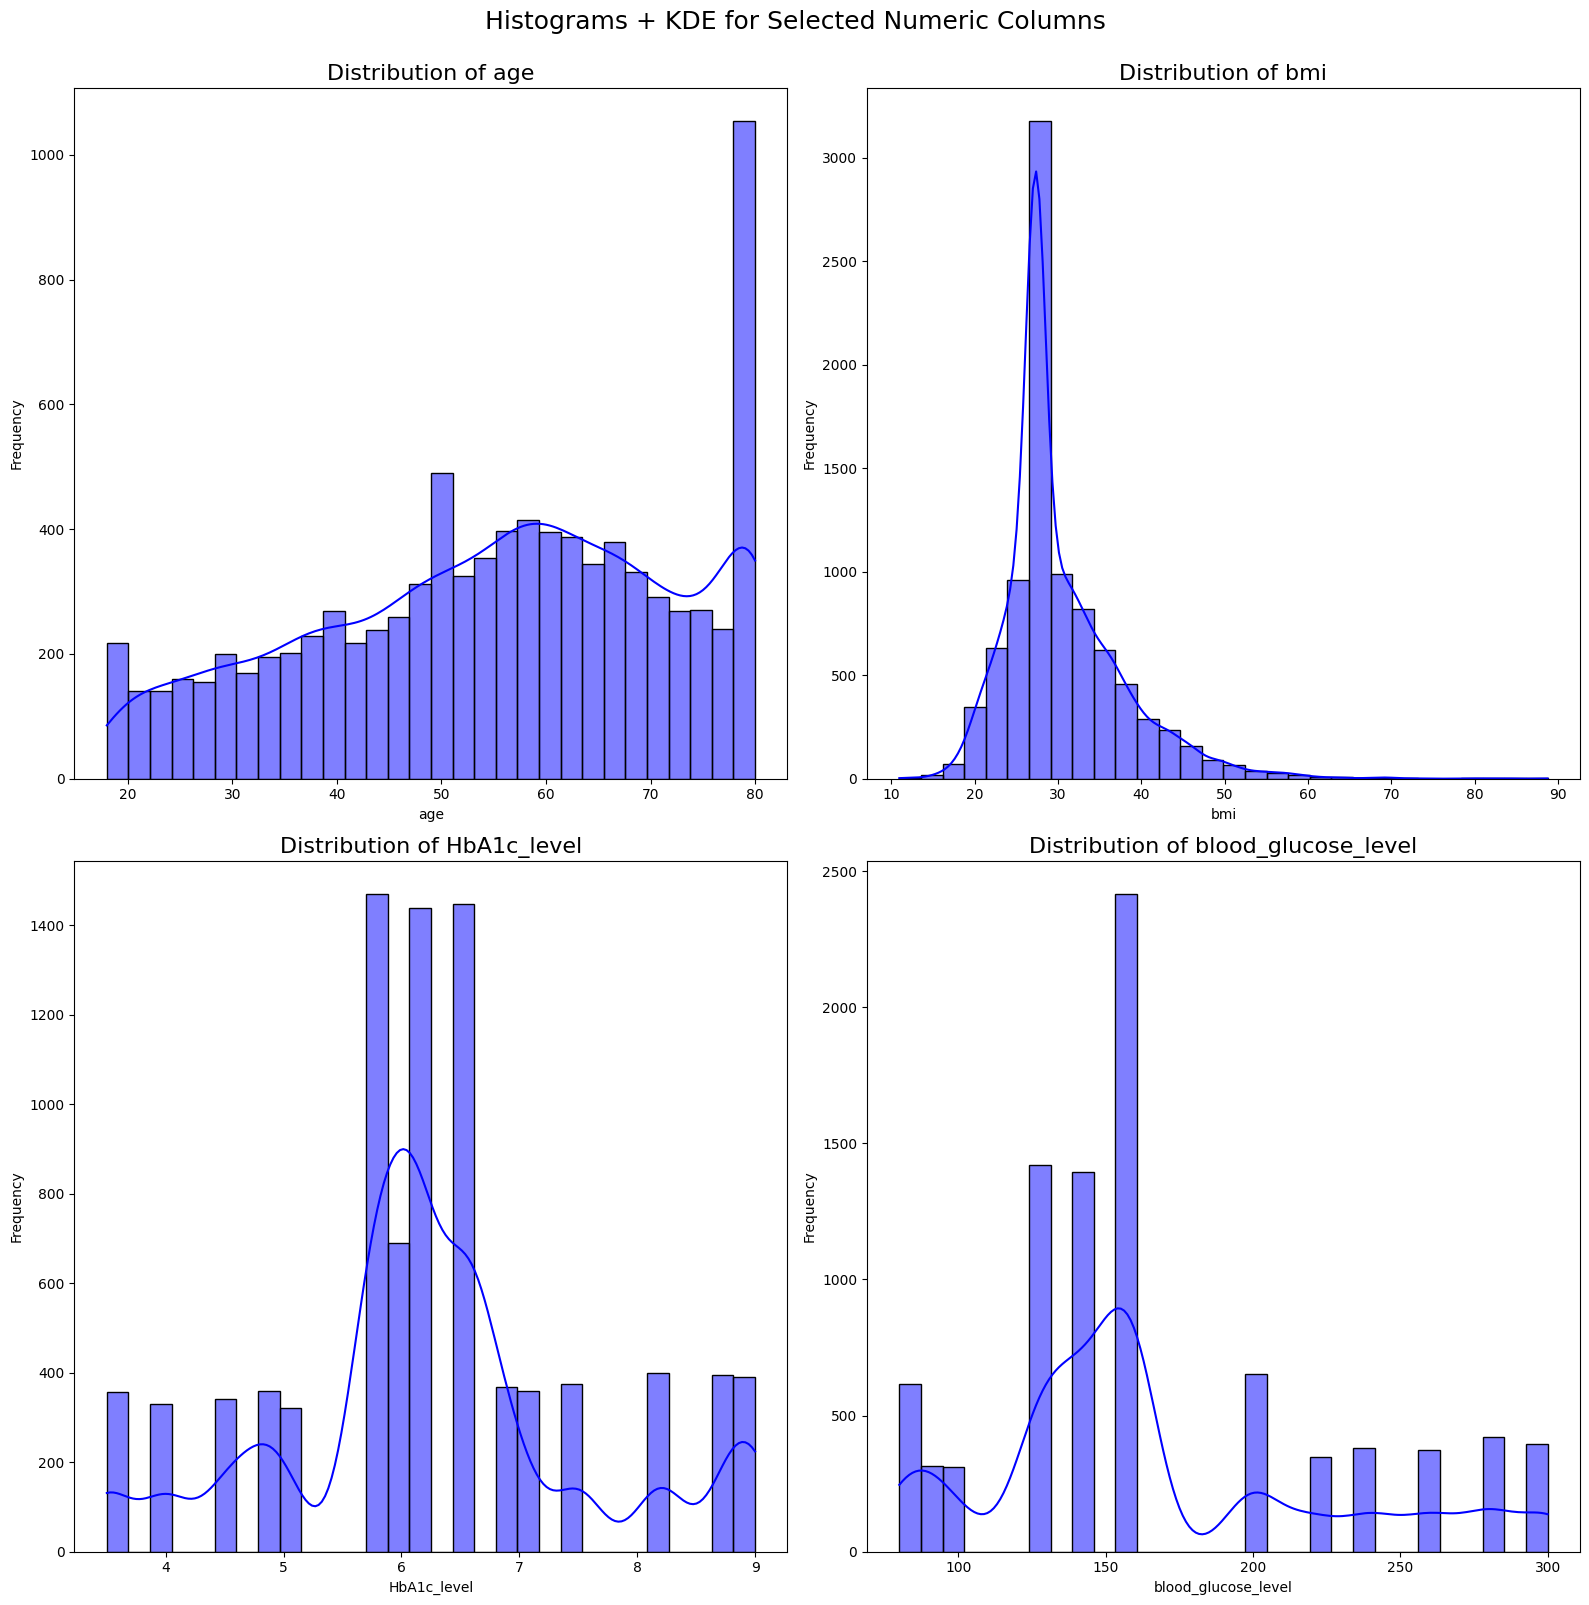

In [45]:
num_cols = ['age','bmi','HbA1c_level','blood_glucose_level']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 16))
axes = axes.flatten()  # flatten to loop easily

for i, col in enumerate(num_cols):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i], color='blue', edgecolor='black')
    axes[i].set_title(f'Distribution of {col}', fontsize=16)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

fig.suptitle('Histograms + KDE for Selected Numeric Columns', fontsize=18,y=1) 
plt.tight_layout()
plt.show()

#### * Here's what we can say about the data distribution from above plots:

#### 1. Age

**Distribution Shape:** Right-skewed (positively skewed).

**Observations:**
- Frequencies increase with age, peaking at around 75–80.
- There’s a notable spike near 80.

**Inference:** Most of the patients are older adults, with a concentration in the 50–80 age range.

#### 2. BMI (Body Mass Index)

**Distribution Shape**: Right-skewed (positively skewed).

**Observations:**
- The mode (most common BMI) is around 28–30.
- Long tail towards higher BMI values.(this supports our earlier observation of outliers).
- Very few individuals have a BMI over 60.

**Inference:** The majority of individuals have BMI values in the overweight/obese range (25–35). Some outliers with very high BMI exist.

#### 3. HbA1c Level

**Distribution Shape:** Multimodal

**Observations:**
- Peaks around 6.0–6.5 and again around 8.0–8.5.

**Inference:** Indicates that many individuals are clustered around diabetic or prediabetic thresholds. Possibly influenced by clinical cutoffs (e.g., 6.5%).

#### 4. Blood Glucose Level

**Distribution Shape:** Multimodal with possible right skew.

**Observations:**
- A strong peak around 140–150.
- Secondary clusters at higher levels (200+).
- Wide spread with a long tail on the right.

**Inference:** Indicates a mixed population — possibly both diabetic and non-diabetic individuals. The high number of elevated glucose levels suggests a focus on patients at risk for or diagnosed with diabetes.

* Bar plots to visualize the distribution of numerical binary variables hypertension, heart_disease

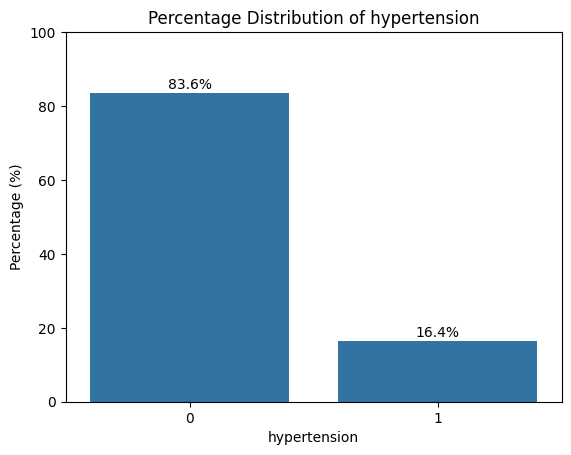

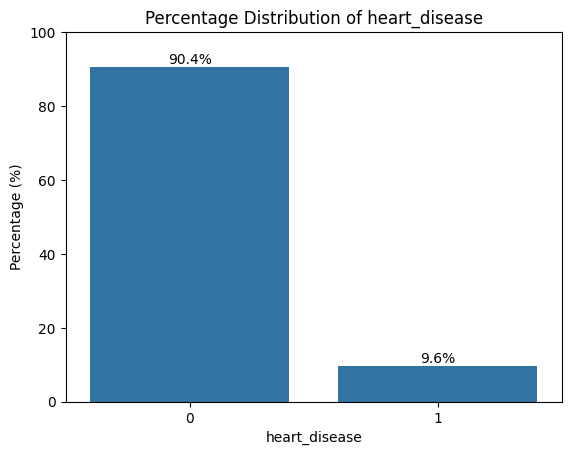

In [53]:
# calculating the percentage distribution of the variables 'hypertension' and 'heart_disease'

num_bin_cols = ['hypertension', 'heart_disease']

for col in num_bin_cols:
    val_counts = df[col].value_counts(normalize=True)*100

    # Plot as bar chart

    sns.barplot(x=val_counts.index, y=val_counts.values)
    
    plt.title(f'Percentage Distribution of {col}')
    plt.ylabel('Percentage (%)')
    plt.xlabel(col)
    plt.ylim(0, 100)  # For better scale

    # Show values on top of bars
    for i, val in enumerate(val_counts.values):
        plt.text(i, val + 1, f'{val:.1f}%', ha='center')
    
    plt.show()


---

# Phase 2: Hypothesis-Driven EDA

Here we will formulate specific hypotheses based on initial obeservations and validate the hypotheses generated using statistical methods.

---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create your folder here
  # os.makedirs(name='')
except Exception as e:
  print(e)
